## Libraries Import

In [10]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

## Reading the Dataset

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.columns

Index(['receipt_id', 'company_id', 'matched_transaction_id',
       'feature_transaction_id', 'DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch', 'flag_match'],
      dtype='object')

In [9]:
feature_names = ['DateMappingMatch', 'AmountMappingMatch',
       'DescriptionMatch', 'DifferentPredictedTime', 'TimeMappingMatch',
       'PredictedNameMatch', 'ShortNameMatch', 'DifferentPredictedDate',
       'PredictedAmountMatch', 'PredictedTimeCloseMatch']

In [16]:
print('Distribution of the Classes in the train dataset')
print(train['flag_match'].value_counts()/len(train))
print('Distribution of the Classes in the test dataset')
print(test['flag_match'].value_counts()/len(test))

Distribution of the Classes in the train dataset
0    0.927774
1    0.072226
Name: flag_match, dtype: float64
Distribution of the Classes in the test dataset
0    0.932735
1    0.067265
Name: flag_match, dtype: float64


In [20]:
# Entire DataFrame
corr = train[feature_names].corr()

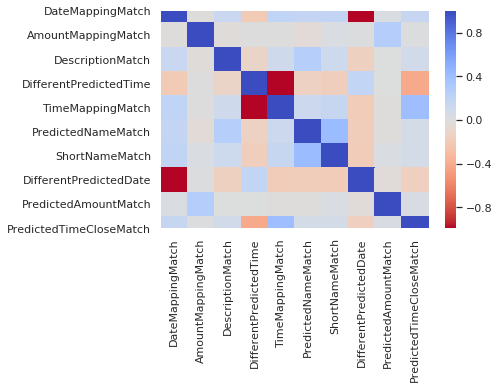

In [21]:
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

*TimeMappingMatch and DifferentPredictedTime are negatively correlated


*DifferentPredictedDate and DateMappingMatch are also negatively correlated

In [23]:
import matplotlib.patches as mpatches
import time

## Bivariate Analysis

Text(0.5, 1.0, 'TimeMappingMatch vs Match Flag')

Text(0.5, 1.0, 'DifferentPredictedTime vs Match Flag')

Text(0.5, 1.0, 'DifferentPredictedDate vs Match Flag')

Text(0.5, 1.0, 'DateMappingMatch vs Match Flag')

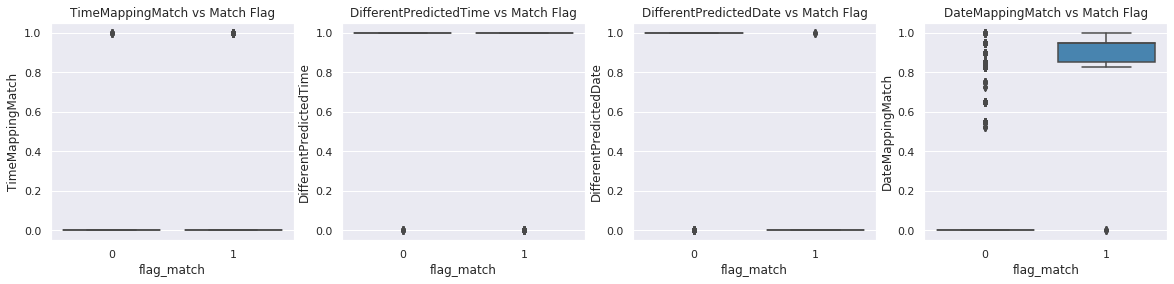

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="flag_match", y="TimeMappingMatch", data=train, palette="Blues", ax=axes[0])
axes[0].set_title('TimeMappingMatch vs Match Flag')

sns.boxplot(x="flag_match", y="DifferentPredictedTime", data=train, palette="Blues", ax=axes[1])
axes[1].set_title('DifferentPredictedTime vs Match Flag')


sns.boxplot(x="flag_match", y="DifferentPredictedDate", data=train, palette="Blues", ax=axes[2])
axes[2].set_title('DifferentPredictedDate vs Match Flag')


sns.boxplot(x="flag_match", y="DateMappingMatch", data=train, palette="Blues", ax=axes[3])
axes[3].set_title('DateMappingMatch vs Match Flag')

plt.show()

Our main aim in this section is to look for "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

We already see that DateMappingMatch shows a different distribution for 0's and 1's

Text(0.5, 1.0, 'PredictedNameMatch vs Match Flag')

Text(0.5, 1.0, 'ShortNameMatch vs Match Flag')

Text(0.5, 1.0, 'DescriptionMatch vs Match Flag')

Text(0.5, 1.0, 'AmountMappingMatch vs Match Flag')

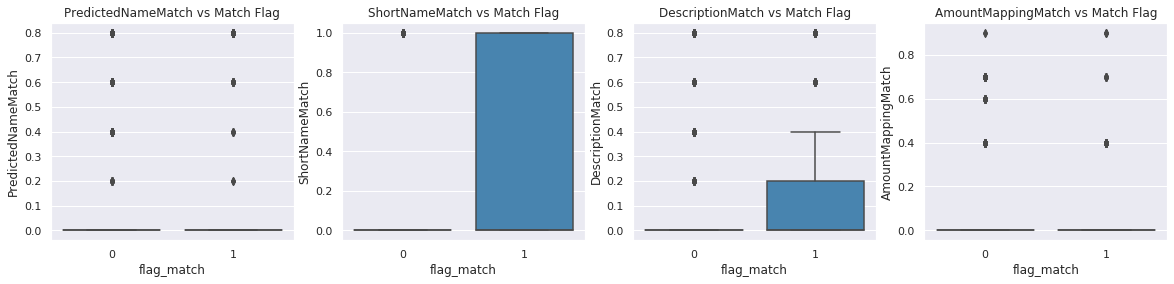

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="flag_match", y="PredictedNameMatch", data=train, palette="Blues", ax=axes[0])
axes[0].set_title('PredictedNameMatch vs Match Flag')

sns.boxplot(x="flag_match", y="ShortNameMatch", data=train, palette="Blues", ax=axes[1])
axes[1].set_title('ShortNameMatch vs Match Flag')


sns.boxplot(x="flag_match", y="DescriptionMatch", data=train, palette="Blues", ax=axes[2])
axes[2].set_title('DescriptionMatch vs Match Flag')


sns.boxplot(x="flag_match", y="AmountMappingMatch", data=train, palette="Blues", ax=axes[3])
axes[3].set_title('AmountMappingMatch vs Match Flag')

plt.show()

Text(0.5, 1.0, 'PredictedAmountMatch vs Match Flag')

Text(0.5, 1.0, 'PredictedTimeCloseMatch vs Match Flag')

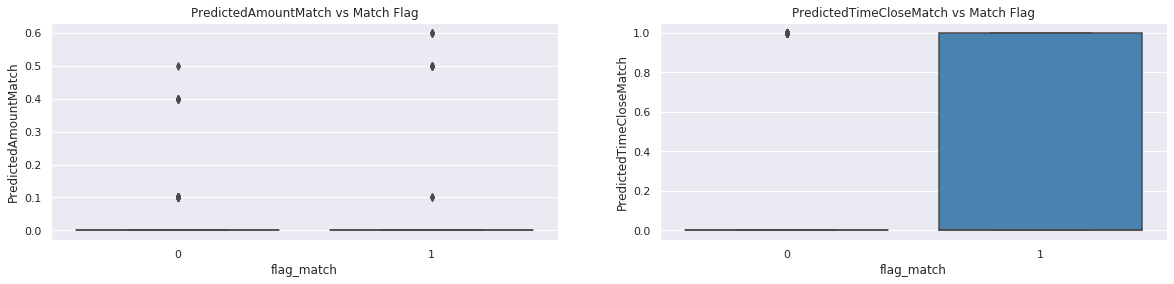

In [29]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="flag_match", y="PredictedAmountMatch", data=train, palette="Blues", ax=axes[0])
axes[0].set_title('PredictedAmountMatch vs Match Flag')

sns.boxplot(x="flag_match", y="PredictedTimeCloseMatch", data=train, palette="Blues", ax=axes[1])
axes[1].set_title('PredictedTimeCloseMatch vs Match Flag')

plt.show()

## Dimensionality Reduction and Clustering:

In [30]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

X = train[feature_names]
y = train['flag_match']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.4e+02 s
PCA took 0.032 s
Truncated SVD took 0.043 s


Text(0.5, 0.98, 'Clusters using Dimensionality Reduction')

Text(0.5, 1.0, 't-SNE')

Text(0.5, 1.0, 'PCA')

Text(0.5, 1.0, 'Truncated SVD')

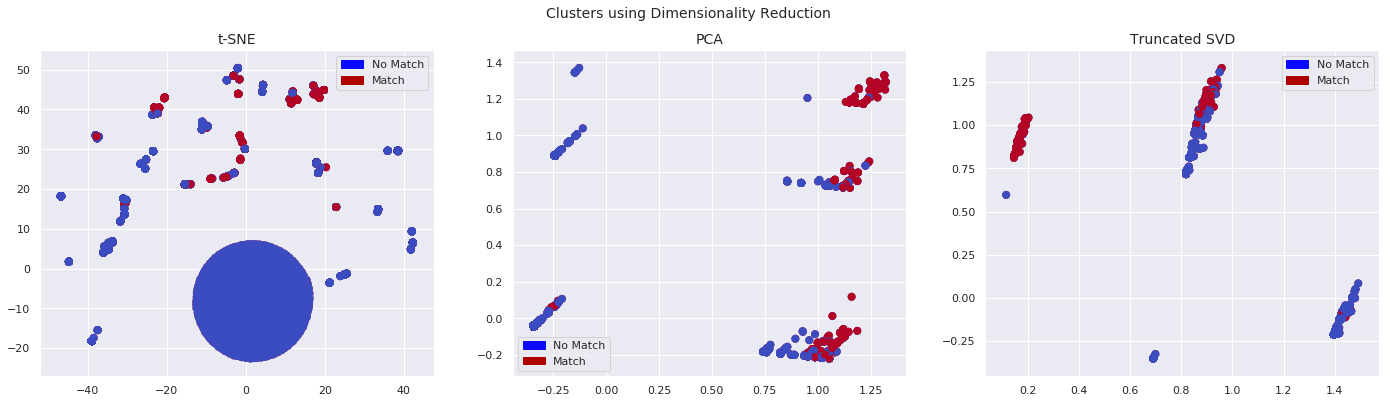

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Match')
red_patch = mpatches.Patch(color='#AF0000', label='Match')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Match', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Match', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Match', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Match', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Match', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Match', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Summary:
    
* t-SNE algorithm can pretty accurately cluster the cases that were match and non-match in our dataset.
* Although the Sample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately.
* This gives us an indication that further predictive models will perform pretty well in separating match from non match cases.

## Binary Classifiers

In [36]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Turn the values into an array for feeding the classification algorithms.
X_train = train[feature_names].values
X_test = test[feature_names].values
y_train = train['flag_match'].values
y_test = test['flag_match'].values

In [37]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [38]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Classifiers:  SVC Has a training score of 96.0 % accuracy score


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classifiers:  DecisionTreeClassifier Has a training score of 96.0 % accuracy score


In [39]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]

In [40]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.62%
Knears Neighbors Cross Validation Score 95.19%
Support Vector Classifier Cross Validation Score 95.25%
DecisionTree Classifier Cross Validation Score 95.35%


In [44]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

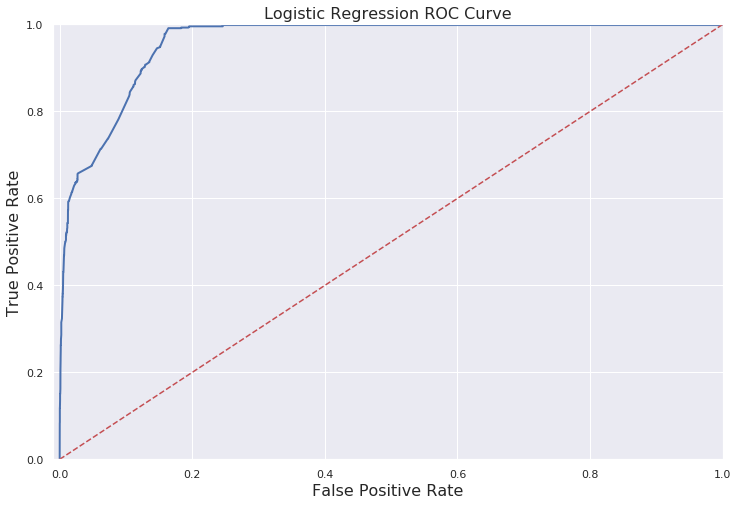

In [45]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

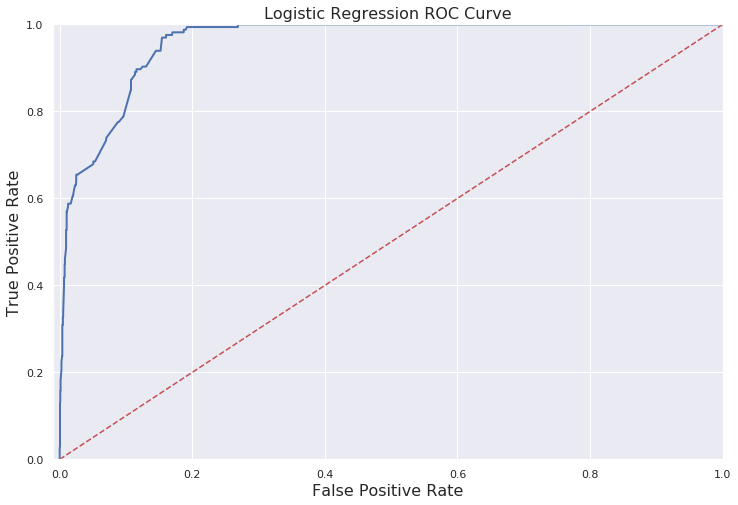

In [46]:
log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,
                             method="decision_function")
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)

logistic_roc_curve(log_fpr, log_tpr)
plt.show()